In [ ]:
MODELTRAINING

Import Packages

In [31]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Image Data Argumentation

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

Loading Our Data And Perform Data Argumentation

In [33]:
x_train = train_datagen.flow_from_directory(r'/kaggle/input/dataset/train/train', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'/kaggle/input/dataset/train/test', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 1 classes.


In [34]:
print(x_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


Initializing The Model

In [35]:
model=Sequential()

Adding CNN Layers

In [36]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [37]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
model.add(Flatten())

Adding Dense Layers

In [39]:
model.add(Dense(units=512, activation='relu'))

In [40]:
model.add(Dense(units=6, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

Configure The Learning Process

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train The Model

In [43]:
model.fit_generator(x_train,
                    steps_per_epoch =594/3,
                    epochs=25,
                    validation_data=x_test,
                    validation_steps=30/3)

Epoch 1/25
198/198 [==============================] - 6s 27ms/step - loss: 1.2945 - accuracy: 0.4646 - val_loss: 30.6939 - val_accuracy: 0.1667
Epoch 2/25
198/198 [==============================] - 5s 26ms/step - loss: 0.5702 - accuracy: 0.7609 - val_loss: 45.7621 - val_accuracy: 0.1667
Epoch 3/25
198/198 [==============================] - 5s 26ms/step - loss: 0.3793 - accuracy: 0.8552 - val_loss: 54.0474 - val_accuracy: 0.1667
Epoch 4/25
198/198 [==============================] - 5s 27ms/step - loss: 0.2477 - accuracy: 0.8990 - val_loss: 61.6622 - val_accuracy: 0.1667
Epoch 5/25
198/198 [==============================] - 6s 29ms/step - loss: 0.1835 - accuracy: 0.9428 - val_loss: 70.4481 - val_accuracy: 0.1667
Epoch 6/25
198/198 [==============================] - 5s 26ms/step - loss: 0.1067 - accuracy: 0.9613 - val_loss: 116.4194 - val_accuracy: 0.1667
Epoch 7/25
198/198 [==============================] - 5s 25ms/step - loss: 0.1332 - accuracy: 0.9377 - val_loss: 115.8362 - val_accurac

Save The Model

In [45]:
model.save('gesture.h5')

In [47]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
     json_file.write(model_json)

Model Testing

In [49]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")

In [52]:
img = image.load_img(r'/kaggle/input/dataset/train/test/test/1/1.jpg', grayscale=True, target_size=(64,64))
x = image.img_to_array(img)
x.shape

(64, 64, 1)

In [53]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 1)

In [54]:
pred_x = model.predict(x)
pred_x=np.argmax(pred_x,axis=1)
pred_x

array([1])

In [55]:
index=['0', '1', '2', '3', '4', '5']
result=str(index[pred_x[0]])
result

'1'

In [94]:
import numpy as np
p=[]
for i in range(0,6):
  for j in range(0,5):
    img = image.load_img(r"/kaggle/input/dataset/test (1)/test/"+str(i)+"/"+str(j)+".jpg", grayscale=True, target_size=(64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=-1)
    p.append(pred)
print(p)


[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([3]), array([3]), array([3]), array([3]), array([3]), array([4]), array([4]), array([3]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([5])]


Populating the interactive namespace from numpy and matplotlib


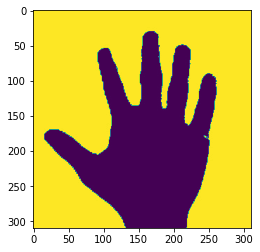

In [104]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"/kaggle/input/dataset/test (1)/test/5/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()